The goal of this project is to develop a convolutional neural network (CNN) to recognize street view housing number digits. This involves several steps:

1.Collect and preprocess the data: This involves collecting images of street view housing number digits, and preprocessing them to prepare them for input into the CNN. Preprocessing may include resizing the images, converting them to grayscale, and normalizing the pixel values.

2.Design the CNN: This involves deciding on the architecture of the CNN, including the number of layers, the types of layers (such as convolutional or fully connected), and the hyperparameters (such as the learning rate and batch size).

3.Train the CNN: Once the CNN is designed, it must be trained on the preprocessed data. This involves feeding the data through the CNN and adjusting the weights and biases of the network to minimize the error between the predicted output and the true output.

4.Evaluate the performance of the CNN: After the CNN is trained, its performance must be evaluated on a separate test dataset to see how well it generalizes to unseen data. This can be done by calculating metrics such as accuracy, precision, and recall.

5.Fine-tune the CNN: If the performance of the CNN is not satisfactory, it may be necessary to fine-tune the network by adjusting the hyperparameters, adding or removing layers, or using a different training algorithm.

6.Deploy the CNN: If the performance of the CNN is satisfactory, it can be deployed for use in recognizing street view housing number digits in the real world.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.layers import Conv2D, Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import LeakyReLU

from tensorflow.keras.models import Sequential
from tensorflow.keras import losses
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.preprocessing.image  import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import warnings
warnings.filterwarnings("ignore")

In [2]:
import h5py
# Open the file
f = h5py.File('SVHN_single_grey1.h5', 'r')

# List all groups
print("Keys: %s" % f.keys())
a_group_key = list(f.keys())[0]

# Get the data
data = list(f[a_group_key])

Keys: <KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>


In [3]:
# Open the file as read only
h5f = h5py.File('SVHN_single_grey1.h5', 'r')

# Load the training and the test set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]
X_val = h5f['X_val'][:]
y_val =h5f['y_val'][:]
# Close this file
h5f.close()

In [4]:
len(X_train), len(X_test),len(X_val),len(y_val),X_train.shape, X_test.shape,X_val.shape,y_val.shape

(42000,
 18000,
 60000,
 60000,
 (42000, 32, 32),
 (18000, 32, 32),
 (60000, 32, 32),
 (60000,))

In [5]:
len(X_val),X_val.shape,len(y_val),y_val.shape

(60000, (60000, 32, 32), 60000, (60000,))

In [6]:
X_train[0]

array([[ 33.0704,  30.2601,  26.852 , ...,  71.4471,  58.2204,  42.9939],
       [ 25.2283,  25.5533,  29.9765, ..., 113.0209, 103.3639,  84.2949],
       [ 26.2775,  22.6137,  40.4763, ..., 113.3028, 121.775 , 115.4228],
       ...,
       [ 28.5502,  36.212 ,  45.0801, ...,  24.1359,  25.0927,  26.0603],
       [ 38.4352,  26.4733,  23.2717, ...,  28.1094,  29.4683,  30.0661],
       [ 50.2984,  26.0773,  24.0389, ...,  49.6682,  50.853 ,  53.0377]],
      dtype=float32)

In [7]:
X_train[0].shape

(32, 32)

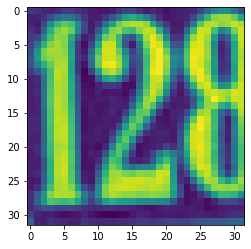

In [8]:
plt.imshow(X_train[0])

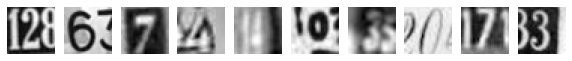

In [8]:
# visualizing the first 10 images of the train dataset
plt.figure(figsize=(10, 1))

for i in range(0,10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray") # function to visualize images
    plt.axis('off')#function in Matplotlib is used to turn off the axis labels and ticks of the plot. This can be useful if you want to remove the distracting elements from the plot and focus on the data itself.

plt.show()

In [9]:
X_train = np.reshape(X_train, (X_train.shape[0],32,32,1))/255.0
y_train = tf.keras.utils.to_categorical(y_train)
X_test = np.reshape(X_test,(X_test.shape[0],32,32,1))/255.0
y_test = tf.keras.utils.to_categorical(y_test)

In [10]:
print('Training data:', X_train.shape, y_train.shape)
print('Testing data:', X_test.shape, y_test.shape)

Training data: (42000, 32, 32, 1) (42000, 10)
Testing data: (18000, 32, 32, 1) (18000, 10)


In [11]:
print("X Train Datasets Shape: {}". format(X_train.shape))
print("Y test Data {}".format(y_test))
print ("Len of Y test Datasets:{}".format(len(y_test[0])))
print("Unique Value is :{}".format(np.unique(y_test[0]))) 
print("Unique Value is :{}".format(np.argmax(y_test[7])))

X Train Datasets Shape: (42000, 32, 32, 1)
Y test Data [[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]]
Len of Y test Datasets:10
Unique Value is :[0. 1.]
Unique Value is :8


Setting the seed for a random number generator allows us to obtain reproducible results when running our code. This can be useful for debugging, testing, and comparing different models or techniques.

In [12]:
#Setting the seed for a random number generator we use 'seed' function
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

Write a function that returns a sequential model with the following architecture
First Convolutional layer with 16 filters and kernel size of 3x3. Use the 'same' padding and provide an apt input shape
Add a LeakyRelu layer with the slope equal to 0.1
Second Convolutional layer with 32 filters and kernel size of 3x3 with 'same' padding
Another LeakyRelu with the slope equal to 0.1
A max-pooling layer with a pool size of 2x2
Flatten the output from the previous layer
Add a dense layer with 32 nodes
Add a LeakyRelu layer with slope equal to 0.1
Add the final output layer with nodes equal to the number of classes and softmax activation
Compile the model with the categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and accuracy metric. Do not fit the model here, just return the compiled model
Call the function and store the model in a new variable
Print the summary of the model.
Fit the model on the train data with a validation split of 0.2, batch size = 32, verbose = 1, and 20 epochs. Store the model building history to use later for visualization.

In [14]:
model = Sequential() 

model.add(Conv2D(filters=16, kernel_size=(3, 3), padding="same", input_shape=(32, 32, 1)))
model.add(LeakyReLU(0.1))
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same"))
model.add(LeakyReLU(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(32))
model.add(LeakyReLU(0.1))
model.add(Dense(10, activation='softmax'))

In [15]:
model.compile(optimizer= Adam(learning_rate= 0.001, decay = 0.005),
             loss = 'categorical_crossentropy', # if terget veriable is more than two categorical crossentropy will be used.
             metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                        

In [18]:
history = model.fit(
            X_train, y_train,
            epochs=20,
            validation_split=0.2,
            batch_size = 32,
            verbose=1)

Epoch 1/20
1050/1050 [==============================] - 47s 43ms/step - loss: 1.5195 - accuracy: 0.5076 - val_loss: 0.9447 - val_accuracy: 0.7350
Epoch 2/20
1050/1050 [==============================] - 46s 43ms/step - loss: 0.8101 - accuracy: 0.7743 - val_loss: 0.7373 - val_accuracy: 0.7954
Epoch 3/20
1050/1050 [==============================] - 45s 43ms/step - loss: 0.6817 - accuracy: 0.8125 - val_loss: 0.6762 - val_accuracy: 0.8121
Epoch 4/20
1050/1050 [==============================] - 46s 44ms/step - loss: 0.6247 - accuracy: 0.8284 - val_loss: 0.6406 - val_accuracy: 0.8260
Epoch 5/20
1050/1050 [==============================] - 46s 44ms/step - loss: 0.5928 - accuracy: 0.8376 - val_loss: 0.6207 - val_accuracy: 0.8268
Epoch 6/20
1050/1050 [==============================] - 46s 44ms/step - loss: 0.5705 - accuracy: 0.8440 - val_loss: 0.6039 - val_accuracy: 0.8332
Epoch 7/20
1050/1050 [==============================] - 46s 44ms/step - loss: 0.5546 - accuracy: 0.8476 - val_loss: 0.5946 -

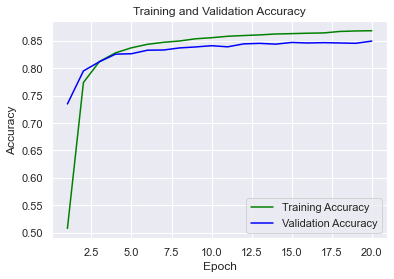

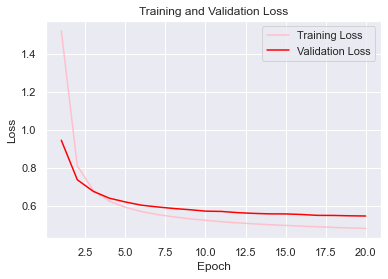

In [19]:
#plotting training values
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [20]:
test_pred = model.predict(X_test)

test_pred = np.argmax(test_pred, axis=-1)

In [21]:
y_test = np.argmax(y_test, axis=-1)

In [22]:
#importing required functions
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Printing the classification report
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1814
           1       0.85      0.88      0.87      1828
           2       0.88      0.86      0.87      1803
           3       0.82      0.79      0.80      1719
           4       0.87      0.88      0.88      1812
           5       0.81      0.85      0.83      1768
           6       0.84      0.82      0.83      1832
           7       0.89      0.88      0.89      1808
           8       0.81      0.81      0.81      1812
           9       0.84      0.83      0.83      1804

    accuracy                           0.85     18000
   macro avg       0.85      0.85      0.85     18000
weighted avg       0.85      0.85      0.85     18000



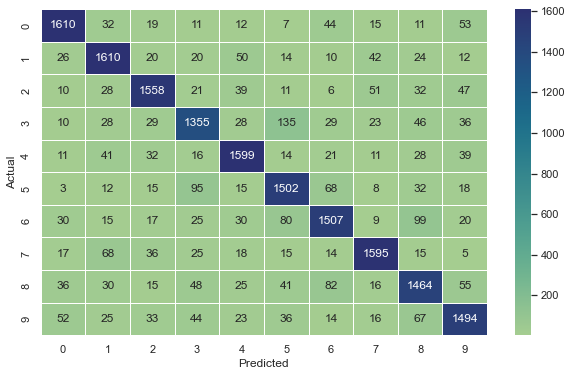

In [23]:
#Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_test, test_pred)
plt.figure(figsize=(10,6))
sns.heatmap(cm,cmap="crest", annot=True,linewidth=.5, fmt='.10g')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()